In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier

In [2]:
breast = load_breast_cancer()
X, y = breast.data, breast.target

In [3]:
params = [
    {"solver": "sgd","learning_rate_init": 0.001},
    {"solver": "adam", "learning_rate_init": 0.001}
]

labels = ["SGD Train", "SGD Val", "ADAM Train", "ADAM Val"]

plot_args = [
    {"c": "red", "linestyle": "-", "marker": "o"},
    {"c": "green", "linestyle": "-", "marker": "o"},
]

In [4]:
max_iter = 400

mlpSGD = MLPClassifier(
    hidden_layer_sizes=[60,120,15],
    random_state=0,
    max_iter=max_iter,
    verbose=True,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.3,
    **params[0])

mlpADAM = MLPClassifier(
    hidden_layer_sizes=[60,120,15],
    random_state=0,
    max_iter=max_iter,
    verbose=True,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.3,
    **params[1])

In [5]:
mlpSGD.fit(X, y)

Iteration 1, loss = 12.01203180
Validation score: 0.374269
Iteration 2, loss = 16.97086515
Validation score: 0.625731
Iteration 3, loss = 3.52976980
Validation score: 0.374269
Iteration 4, loss = 2.59929984
Validation score: 0.444444
Iteration 5, loss = 0.64191601
Validation score: 0.555556
Iteration 6, loss = 0.58625405
Validation score: 0.900585
Iteration 7, loss = 0.57371925
Validation score: 0.695906
Iteration 8, loss = 0.60727622
Validation score: 0.736842
Iteration 9, loss = 0.57991567
Validation score: 0.853801
Iteration 10, loss = 0.55539734
Validation score: 0.725146
Iteration 11, loss = 0.55307520
Validation score: 0.859649
Iteration 12, loss = 0.54020143
Validation score: 0.888889
Iteration 13, loss = 0.53779691
Validation score: 0.888889
Iteration 14, loss = 0.52245357
Validation score: 0.900585
Iteration 15, loss = 0.50495614
Validation score: 0.894737
Iteration 16, loss = 0.49191108
Validation score: 0.906433
Iteration 17, loss = 0.50001914
Validation score: 0.842105
Iter

MLPClassifier(early_stopping=True, hidden_layer_sizes=[60, 120, 15],
              max_iter=400, random_state=0, solver='sgd',
              validation_fraction=0.3, verbose=True)

In [6]:
mlpADAM.fit(X,y)

Iteration 1, loss = 5.68057063
Validation score: 0.625731
Iteration 2, loss = 1.86082695
Validation score: 0.491228
Iteration 3, loss = 1.05934820
Validation score: 0.824561
Iteration 4, loss = 0.73850945
Validation score: 0.900585
Iteration 5, loss = 0.31386150
Validation score: 0.730994
Iteration 6, loss = 0.53774140
Validation score: 0.894737
Iteration 7, loss = 0.32491767
Validation score: 0.883041
Iteration 8, loss = 0.36652304
Validation score: 0.900585
Iteration 9, loss = 0.24689415
Validation score: 0.859649
Iteration 10, loss = 0.28558008
Validation score: 0.906433
Iteration 11, loss = 0.21894956
Validation score: 0.918129
Iteration 12, loss = 0.20480221
Validation score: 0.894737
Iteration 13, loss = 0.19991887
Validation score: 0.894737
Iteration 14, loss = 0.18818213
Validation score: 0.918129
Iteration 15, loss = 0.19493226
Validation score: 0.912281
Iteration 16, loss = 0.19318010
Validation score: 0.900585
Iteration 17, loss = 0.18796457
Validation score: 0.906433
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=[60, 120, 15],
              max_iter=400, random_state=0, validation_fraction=0.3,
              verbose=True)

In [7]:
print("Training set score SGD: %f" % mlpSGD.score(X, y))
print("Training set loss SGD: %f" % mlpSGD.loss_)
print("Training set score ADAM: %f" % mlpADAM.score(X, y))
print("Training set loss ADAM: %f" % mlpADAM.loss_)

Training set score SGD: 0.905097
Training set loss SGD: 0.428002
Training set score ADAM: 0.913884
Training set loss ADAM: 0.173560


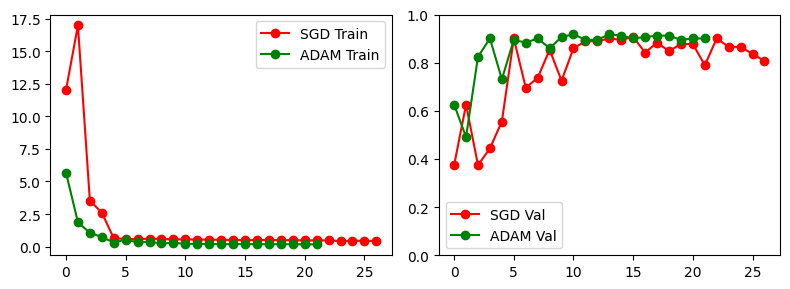

In [8]:
fig, axes = plt.subplots(1,2,figsize=(8,3))

ax = axes[0]
ax.plot(mlpSGD.loss_curve_, label=labels[0], **plot_args[0])
ax.plot(mlpADAM.loss_curve_, label=labels[2], **plot_args[1])
ax.legend()

ax = axes[1]
ax.plot(mlpSGD.validation_scores_, label=labels[1], **plot_args[0])
ax.plot(mlpADAM.validation_scores_, label=labels[3], **plot_args[1])
ax.set_ylim([0,1])
ax.legend()

plt.tight_layout()
plt.show()